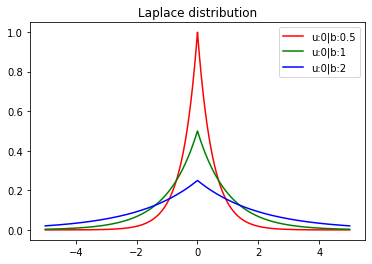

In [7]:
import matplotlib.pyplot as plt
import numpy as np
 
def laplace_function(x, b):
    result = (1/(2*b)) * np.e**(-1*(np.abs(x)/b))
    return result

#在-5到5之间等间隔的取10000个数
x = np.linspace(-5,5,10000)
y1 = [laplace_function(x_,0.5) for x_ in x]
y2 = [laplace_function(x_,1) for x_ in x]
y3 = [laplace_function(x_,2) for x_ in x]
 
 
plt.plot(x,y1,color='r',label='u:0|b:0.5')
plt.plot(x,y2,color='g',label='u:0|b:1')
plt.plot(x,y3,color='b',label='u:0|b:2')
plt.title("Laplace distribution")
plt.legend()
plt.show()

In [21]:
import numpy as np
 
# 计算基于拉普拉斯分布的噪声
def laplace_noisy(sensitivety,epsilon):
    n_value = np.random.laplace(0, sensitivety/epsilon, 1)
    return n_value

# 基于laplace的分布函数的反函数计算
def laplace_noisy2(sensitivety, epsilon):
    b = sensitivety/epsilon
    u1 = np.random.random()
    u2 = np.random.random()
    if u1 <= 0.5:
        noisy = -b*np.log(1.-u2)
    else:
        noisy = b*np.log(u2)
    return noisy

# 计算基于拉普拉斯加噪的混淆值
def laplace_mech(data, sensitivety, epsilon):
    for i in range(len(data)):
        data[i] += laplace_noisy(sensitivety,epsilon)
    return data
 
# 基于拉普拉斯分布的特性，如果想要分布震荡较小，需要将隐私预算epsilon的值设置较大
if __name__ =='__main__':
    data = [1.,2.,3.]
    sensitivety = 1
    epsilon = 100
    data_noisy = laplace_mech(data, sensitivety, epsilon)
    for j in data_noisy:
        print("Final Resulet = %.16f" % j)

Final Resulet = 0.9805994492148127
Final Resulet = 2.0309953530255811
Final Resulet = 3.0040035266452314
